In [5]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

src_path = r"F:\Work\SOCAAutomation\Dataset\Converted"
dst_path = r"F:\Work\SOCAAutomation\Dataset\Images\SplitVideos"
excel = pd.read_excel(r"F:\Work\SOCAAutomation\Dataset\DatasetAnalysisReport.xlsx", sheet_name = 'Video Extraction')

output_folder = "Frames"
os.makedirs(output_folder, exist_ok=True)

In [6]:
excel_group = pd.DataFrame()
excel_group['Start Time'] = excel.groupby(['Folder', 'Video File'])['Start Time'].apply(list)
excel_group['End Time'] = excel.groupby(['Folder', 'Video File'])['End Time'].apply(list)
excel_group.reset_index(inplace = True)
excel_group.head()

,Folder,Video File,Start Time,End Time
0,04_07_2024,AXIS 213 - 10.1.5.173 2024-07-04_11_51_08_772,"[02;51, 02;56, 03;12, 03;19, 03;35, 03;42, 03;...","[02;53, 02;59, 03;14, 03;21, 03;37, 03;43, 03;..."
1,09_07_2024,AXIS 213 - 10.1.5.173 2024-07-09_11_30_00_000,"[02;16, 02;19, 02;23, 03;00, 03;04, 03;26, 03;...","[02;18, 02;21, 02;25, 03;03, 03;06, 03;28, 03;..."
2,09_07_2024,AXIS 213 - 10.1.5.173 2024-07-09_14_44_00_000,"[00;24, 00;41]","[00;31, 00;43]"
3,14_08_2024,AXIS 213 - 10.1.5.173 2024-08-14_15_34_48_759,"[08;30, 13;12, 13;22, 13;26, 13;52]","[09;56, 13;14, 13;24, 13;50, 14;18]"
4,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,"[04;48, 04;53, 05;05, 05;12, 05;15, 06;19, 06;...","[04;51, 04;54, 05;05, 05;14, 05;17, 06;21, 06;..."


In [7]:
excel_group

,Folder,Video File,Start Time,End Time
0,04_07_2024,AXIS 213 - 10.1.5.173 2024-07-04_11_51_08_772,"[02;51, 02;56, 03;12, 03;19, 03;35, 03;42, 03;...","[02;53, 02;59, 03;14, 03;21, 03;37, 03;43, 03;..."
1,09_07_2024,AXIS 213 - 10.1.5.173 2024-07-09_11_30_00_000,"[02;16, 02;19, 02;23, 03;00, 03;04, 03;26, 03;...","[02;18, 02;21, 02;25, 03;03, 03;06, 03;28, 03;..."
2,09_07_2024,AXIS 213 - 10.1.5.173 2024-07-09_14_44_00_000,"[00;24, 00;41]","[00;31, 00;43]"
3,14_08_2024,AXIS 213 - 10.1.5.173 2024-08-14_15_34_48_759,"[08;30, 13;12, 13;22, 13;26, 13;52]","[09;56, 13;14, 13;24, 13;50, 14;18]"
4,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,"[04;48, 04;53, 05;05, 05;12, 05;15, 06;19, 06;...","[04;51, 04;54, 05;05, 05;14, 05;17, 06;21, 06;..."
5,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_13_40_00_000,"[3;26, 3;29, 3;30, 3;32, 3;35, 3;48, 4;08, 4;1...","[3;28, 3;31, 3;32, 3;34, 3;37, 3;50, 4;15, 4;1..."
6,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_15_45_00_000,"[9;08, 9;12, 9;15, 9;23]","[9;10, 9;14, 9;17, 9;24]"


In [11]:
fps = 30
for i in range(len(excel_group)):
    file_path = src_path + "/" + excel_group.loc[i, 'Folder'] + "/" + excel_group.loc[i, 'Video File'] + ".mp4"
    folder = dst_path + "/" + excel_group.loc[i, 'Video File'].split()[-1]
#     if folder == dst_path + "/" + '2024-08-22_10_40_00_000':
#         print(f"Folder {folder} is skipped")
#         continue
    cap = cv2.VideoCapture(file_path)
    segment = 1
    start_time_list = list(excel_group.loc[i, 'Start Time'])
    end_time_list = list(excel_group.loc[i, 'End Time'])
    for j in range(len(start_time_list)):
        
        start_time = start_time_list[j]
        end_time = end_time_list[j]
        
        print(f"Starting Segment {segment} => {start_time} to {end_time}")
        output_folder = folder +  "/" + str(segment)
        os.makedirs(output_folder, exist_ok=True)
    
        start_min = int(start_time.split(";")[0])
        start_sec = int(start_time.split(";")[1])
        start_sec = start_min * 60 + start_sec

        end_min = int(end_time.split(";")[0])
        end_sec = int(end_time.split(";")[1]) + 1
        end_sec = end_min * 60 + end_sec

        start_frame = int(start_sec * fps)
        end_frame   = int(end_sec * fps)

        frame_no = start_frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
        
        print(f"Start Frame: {start_frame}, End Frame: {end_frame}")
        while frame_no <= end_frame:
            ret, frame = cap.read()
            if not ret:
                break

            filename = os.path.join(output_folder, f"frame_{frame_no:06d}.jpg")
            cv2.imwrite(filename, frame)

            frame_no += 1
        segment += 1

    cap.release()


Starting Segment 1 => 02;51 to 02;53
Start Frame: 5130, End Frame: 5220
Starting Segment 2 => 02;56 to 02;59
Start Frame: 5280, End Frame: 5400
Starting Segment 3 => 03;12 to 03;14
Start Frame: 5760, End Frame: 5850
Starting Segment 4 => 03;19 to 03;21
Start Frame: 5970, End Frame: 6060
Starting Segment 5 => 03;35 to 03;37
Start Frame: 6450, End Frame: 6540
Starting Segment 6 => 03;42 to 03;43
Start Frame: 6660, End Frame: 6720
Starting Segment 7 => 03;53 to 03;55
Start Frame: 6990, End Frame: 7080
Starting Segment 8 => 04;14 to 04;16
Start Frame: 7620, End Frame: 7710
Starting Segment 9 => 05;01 to 05;03
Start Frame: 9030, End Frame: 9120
Starting Segment 10 => 07;30 to 07;32
Start Frame: 13500, End Frame: 13590
Starting Segment 1 => 02;16 to 02;18
Start Frame: 4080, End Frame: 4170
Starting Segment 2 => 02;19 to 02;21
Start Frame: 4170, End Frame: 4260
Starting Segment 3 => 02;23 to 02;25
Start Frame: 4290, End Frame: 4380
Starting Segment 4 => 03;00 to 03;03
Start Frame: 5400, End F

In [10]:
list(excel_group.loc[i, 'Start Time'])

['02;51',
 '02;56',
 '03;12',
 '03;19',
 '03;35',
 '03;42',
 '03;53',
 '04;14',
 '05;01',
 '07;30']

# Extract Minor Segments

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import shutil

src_path = r"F:\Work\SOCAAutomation\Dataset\Images\SplitVideos"
dst_path = r"F:\Work\SOCAAutomation\Dataset\Images\SplitVideosMinorSegments"


# output_folder = "Frames"
# os.makedirs(output_folder, exist_ok=True)

In [23]:
excel = pd.read_excel(r"F:\Work\SOCAAutomation\Dataset\DatasetAnalysisReport.xlsx", sheet_name = 'Video Extraction')
excel.head()

,Folder,Video File,File Path,Sub Segment,Start Time,End Time,No of Frames,Start Frame,End Frame,Sputtering,Out of Focus,Visibility,Misc,Temp,Folders,Image Selection
0,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,1,04;48,04;51,3.0,74,77,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,2,04;53,04;54,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
2,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,3,05;05,05;05,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
3,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,4,05;12,05;14,16.0,31,48,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,5,05;15,05;17,10.0,30,40,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data = excel[(excel['Sputtering'] == 'Yes') | (excel['Sputtering'] == 'yes')]
data.head()

,Folder,Video File,File Path,Sub Segment,Start Time,End Time,No of Frames,Start Frame,End Frame,Sputtering,Out of Focus,Visibility,Misc,Temp,Folders,Image Selection
0,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,1,04;48,04;51,3.0,74,77,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,4,05;12,05;14,16.0,31,48,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,5,05;15,05;17,10.0,30,40,Yes,NaN,NaN,NaN,NaN,NaN,NaN
5,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,6,06;19,06;21,10.0,38,48,Yes,NaN,NaN,NaN,NaN,NaN,NaN
6,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,7,06;25,06;27,8.0,26,34,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['Start Frame'] = data['Start Frame'].apply(str2numlist)
data['End Frame'] = data['End Frame'].apply(str2numlist)

In [ ]:

    start_list = data['File Path'].iloc[i].split(",")

In [27]:
def str2numlist(x):
    if not type(x) is int:
        temp = x.split(",")
        temp = [int(ele.strip()) for ele in temp]
        return temp
    else:
        return [x]

In [81]:
for i in range(len(data)):
    src_full_path = src_path + "/" + data['File Path'].iloc[i] + "/" + str(data['Sub Segment'].iloc[i])
    dst_full_path = dst_path + "/" + data['File Path'].iloc[i] + "/" + str(data['Sub Segment'].iloc[i])
    files = os.listdir(src_full_path)
    
    start_list = data['Start Frame'].iloc[i]
    end_list = data['End Frame'].iloc[i]
    sub_seg = 1
    for start_idx in range(len(start_list)):
        start_val = start_list[start_idx]
        end_val = end_list[start_idx]
        for file_index in np.arange(start_val-1, end_val):
            file = files[file_index]
            file_path = src_full_path + "/" + file
            os.makedirs(dst_full_path + "/" + str(sub_seg), exist_ok=True)
            shutil.copy2(file_path, dst_full_path + "/" + str(sub_seg))
            print(file_path)
        sub_seg += 1

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/1/frame_008713.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/1/frame_008714.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/1/frame_008715.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/1/frame_008716.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/4/frame_009390.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/4/frame_009391.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/4/frame_009392.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/4/frame_009393.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/4/frame_009394.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/4/frame_009395.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/11/frame_015444.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/12/frame_015516.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/12/frame_015517.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/12/frame_015518.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/12/frame_015519.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/12/frame_015520.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/12/frame_015521.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/12/frame_015522.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/12/frame_015523.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/12/frame_015546.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/17/frame_037795.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/17/frame_037796.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/17/frame_037797.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/17/frame_037813.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/17/frame_037814.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/17/frame_037815.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/17/frame_037816.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/17/frame_037817.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/17/frame_037818.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_10_40_00_000/17/frame_037819.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/1/frame_006222.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/1/frame_006223.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/1/frame_006224.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/1/frame_006225.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/1/frame_006226.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/1/frame_006227.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/1/frame_006228.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/1/frame_006229.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/3/frame_006376.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/3/frame_006377.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/8/frame_007727.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/8/frame_007728.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/8/frame_007729.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/8/frame_007730.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/8/frame_007731.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/8/frame_007732.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/8/frame_007733.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/8/frame_007734.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/8/frame_007735.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/8/frame_007736.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/11/frame_012062.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/11/frame_012063.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/11/frame_012064.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/11/frame_012065.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/11/frame_012066.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/11/frame_012067.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/11/frame_012068.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/11/frame_012069.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/11/frame_012072.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/11/frame_012073.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/13/frame_012168.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/13/frame_012169.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/13/frame_012170.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/13/frame_012171.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/13/frame_012172.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/13/frame_012173.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/13/frame_012174.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/13/frame_012175.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/13/frame_012176.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/13/frame_012177.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/16/frame_012895.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/16/frame_012896.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/16/frame_012897.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/16/frame_012898.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/16/frame_012899.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/16/frame_012900.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/16/frame_012901.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/16/frame_012902.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/16/frame_012903.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/16/frame_012904.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/19/frame_018920.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/19/frame_018921.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/19/frame_018922.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/19/frame_018923.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/19/frame_018924.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/19/frame_018925.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/19/frame_018926.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/19/frame_018927.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/19/frame_018928.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_13_40_00_000/19/frame_018929.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_000/3/frame_016659.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_000/3/frame_016660.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_000/3/frame_016661.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_000/3/frame_016662.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_000/3/frame_016663.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_000/3/frame_016664.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_000/3/frame_016671.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_000/3/frame_016672.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_000/3/frame_016673.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_000/3/frame_016674.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-22_15_45_00_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/3/frame_005779.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/3/frame_005780.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/3/frame_005781.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/3/frame_005782.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/3/frame_005783.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/3/frame_005784.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/3/frame_005785.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/3/frame_005792.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/3/frame_005793.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/3/frame_005794.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/7/frame_007020.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/7/frame_007021.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/7/frame_007022.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/7/frame_007023.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/7/frame_007025.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/7/frame_007026.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/7/frame_007027.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/7/frame_007028.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/7/frame_007029.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/7/frame_007030.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-04_11_51_08_772/10/frame_013576.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/1/frame_004146.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/1/frame_004147.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/1/frame_004148.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/1/frame_004149.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/1/frame_004150.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/1/frame_004151.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/1/frame_004152.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/1/frame_004159.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/1/frame_004160.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/8/frame_007991.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/8/frame_007992.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/8/frame_007993.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/8/frame_007994.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/8/frame_007995.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/8/frame_007996.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/8/frame_007997.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/8/frame_007999.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/8/frame_008000.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/8/frame_008001.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/12/frame_010156.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/12/frame_010157.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/12/frame_010158.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/12/frame_010159.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/12/frame_010160.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/12/frame_010161.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/12/frame_010162.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/12/frame_010173.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/12/frame_010174.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09_11_30_00_000/12/frame_010175.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-07-09

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015465.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015466.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015480.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015481.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015482.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015483.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015484.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015485.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015486.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015487.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015660.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015661.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015662.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015663.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015664.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015665.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015666.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015667.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015668.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_015669.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_016005.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_016006.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_016007.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_016008.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_016009.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_016010.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_016011.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_016392.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_016393.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_016394.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_017785.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_017786.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_017799.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_017800.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_017801.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_017802.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_017803.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_017844.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_017845.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/1/frame_017846.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024257.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024258.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024259.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024260.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024261.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024262.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024263.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024264.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024265.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024266.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024379.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024380.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024381.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024382.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024383.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024384.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024385.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024386.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024387.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024388.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024506.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024507.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024508.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024512.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024513.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024514.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024515.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024516.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024517.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024518.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024677.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024678.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024679.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024680.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024681.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024682.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024683.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024684.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024685.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024686.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024790.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024791.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024792.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024793.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024794.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024795.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024796.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024797.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024798.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/4/frame_024799.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025088.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025089.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025102.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025103.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025104.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025105.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025106.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025107.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025108.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025109.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025228.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025229.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025230.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025231.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025232.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025233.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025234.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025235.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025236.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025238.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025351.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025352.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025353.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025354.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025355.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025356.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025357.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025358.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025359.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025360.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025606.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025607.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025608.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025609.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025610.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025611.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025612.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025613.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025614.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_759/5/frame_025615.jpg
F:\Work\SOCAAutomation\Dataset\Images\SplitVideos/2024-08-14_15_34_48_

In [68]:
start_frames = data[['Start Frame', 'End Frame']].apply(lambda x: [b-a for a, b in zip(x['Start Frame'], x['End Frame'])], axis=1)

In [71]:
frame_len = []
for ele in list(start_frames):
    frame_len.extend(ele)

In [78]:
test = pd.value_counts(frame_len).reset_index().sort_values('index')
test['cumsum'] = test[0].cumsum()
test

,index,0,cumsum
23,0,1,1
10,2,8,9
1,3,26,35
3,4,23,58
5,5,22,80
0,6,28,108
2,7,26,134
7,8,15,149
6,9,16,165
4,10,22,187


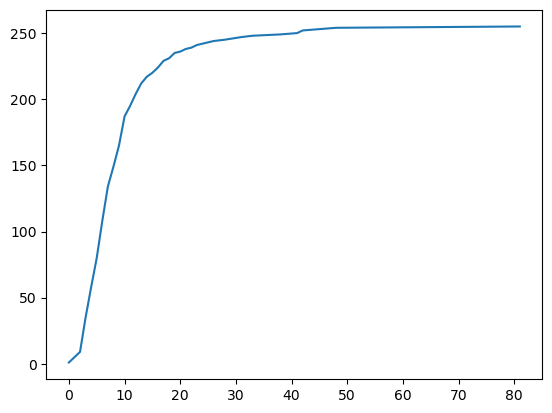

In [80]:
plt.plot(test['index'], test['cumsum'])

(array([35., 73., 57., 39., 20., 11.,  4.,  4.,  2.,  2.,  1.,  1.,  3.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  3.24,  6.48,  9.72, 12.96, 16.2 , 19.44, 22.68, 25.92,
        29.16, 32.4 , 35.64, 38.88, 42.12, 45.36, 48.6 , 51.84, 55.08,
        58.32, 61.56, 64.8 , 68.04, 71.28, 74.52, 77.76, 81.  ]),
 <BarContainer object of 25 artists>)

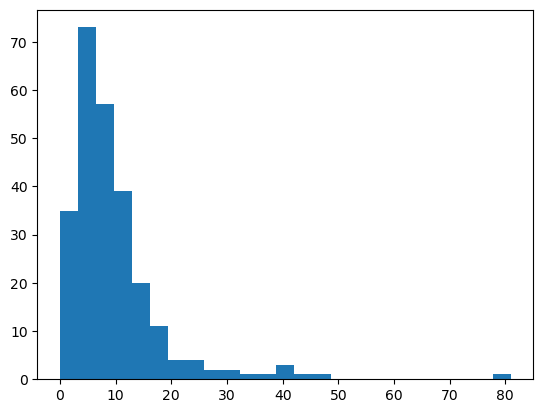

In [73]:
import matplotlib.pyplot as plt
plt.hist(frame_len, bins = 25)

# Prepared by Muthu